In [1]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../sales.csv')

In [5]:
#drop unneed columns
df_clean = df.drop(columns=['Order ID', 'Row ID','Customer ID', 'Segment', 'City',  'Product ID', 'Product Name'], axis=1)


In [6]:
#change to datetime
df_clean['Order Date']= pd.to_datetime(df['Order Date'])

In [7]:
#sort by dates
df_clean.sort_values(by =[ 'Region', 'Order Date'])

,Order Date,State,Region,Category,Sub-Category,Sales
540,2015-01-02,Wisconsin,Central,Technology,Accessories,468.900
6547,2015-01-03,Illinois,Central,Furniture,Chairs,634.116
6548,2015-01-03,Illinois,Central,Office Supplies,Paper,17.472
7947,2015-01-03,Texas,Central,Office Supplies,Fasteners,18.840
7948,2015-01-03,Texas,Central,Furniture,Chairs,362.250
...,...,...,...,...,...,...
5456,2018-12-29,Washington,West,Office Supplies,Fasteners,19.600
5457,2018-12-29,Washington,West,Furniture,Furnishings,68.460
1296,2018-12-30,California,West,Office Supplies,Binders,13.904
1297,2018-12-30,California,West,Office Supplies,Binders,20.720


In [10]:
#seperate into regions category
df_central_tech = df_clean.loc[(df_clean['Region']=='Central') & (df_clean['Category']=='Technology')]
df_central_furniture = df_clean.loc[(df_clean['Region']=='Central') & (df_clean['Category']=='Furniture')]
df_central_os = df_clean.loc[(df_clean['Region']=='Central') & (df_clean['Category']=='Office Supplies')]


df_west_tech = df_clean.loc[(df_clean['Region']=='West') & (df_clean['Category']=='Technology')]
df_west_furniture = df_clean.loc[(df_clean['Region']=='West') & (df_clean['Category']=='Furniture')]
df_west_os = df_clean.loc[(df_clean['Region']=='West') & (df_clean['Category']=='Office Supplies')]


df_south_tech = df_clean.loc[(df_clean['Region']=='South') & (df_clean['Category']=='Technology')]
df_south_furniture = df_clean.loc[(df_clean['Region']=='South') & (df_clean['Category']=='Furniture')]
df_south_os = df_clean.loc[(df_clean['Region']=='South') & (df_clean['Category']=='Office Supplies')]

df_east_tech = df_clean.loc[(df_clean['Region']=='East') & (df_clean['Category']=='Technology')]
df_east_furniture = df_clean.loc[(df_clean['Region']=='East') & (df_clean['Category']=='Furniture')]
df_east_os = df_clean.loc[(df_clean['Region']=='East') & (df_clean['Category']=='Office Supplies')]

In [12]:
#group by days and total sales for day
central_tech = df_central_tech.groupby(['Order Date']).sum().reset_index()
central_furniture = df_central_furniture.groupby(['Order Date']).sum().reset_index()
central_os = df_central_os.groupby(['Order Date']).sum().reset_index()


west_tech = df_west_tech.groupby(['Order Date']).sum().reset_index()
west_furniture = df_west_furniture.groupby(['Order Date']).sum().reset_index()
west_os = df_west_os.groupby(['Order Date']).sum().reset_index()


south_tech = df_south_tech.groupby(['Order Date']).sum().reset_index()
south_furniture = df_south_furniture.groupby(['Order Date']).sum().reset_index()
south_os = df_south_os.groupby(['Order Date']).sum().reset_index()


east_tech = df_east_tech.groupby(['Order Date']).sum().reset_index()
east_furniture = df_east_furniture.groupby(['Order Date']).sum().reset_index()
east_os = df_east_os.groupby(['Order Date']).sum().reset_index()

In [13]:
#reformat column headings to match prophet
central_tech.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
central_furniture.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
central_os.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)


west_tech.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
west_furniture.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
west_os.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)


east_tech.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
east_furniture.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
east_os.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)


south_tech.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
south_furniture.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)
south_os.rename(columns = {'Order Date':'ds', 'Sales':'y'}, inplace = True)

In [14]:
central_furniture_model = Prophet(seasonality_mode='multiplicative').fit(central_furniture)
west_furniture_model = Prophet(seasonality_mode='multiplicative').fit(west_furniture)
east_furniture_model = Prophet(seasonality_mode='multiplicative').fit(east_furniture)
south_furniture_model = Prophet(seasonality_mode='multiplicative').fit(south_furniture)

central_office_supplies_model = Prophet(seasonality_mode='multiplicative').fit(central_os)
west_office_supplies_model = Prophet(seasonality_mode='multiplicative').fit(west_os)
east_office_supplies_model = Prophet(seasonality_mode='multiplicative').fit(east_os)
south_office_supplies_model = Prophet(seasonality_mode='multiplicative').fit(south_os)

central_technology_model = Prophet(seasonality_mode='multiplicative').fit(central_tech)
west_technology_model = Prophet(seasonality_mode='multiplicative').fit(west_tech)
east_technology_model = Prophet(seasonality_mode='multiplicative').fit(east_tech)
south_technology_model = Prophet(seasonality_mode='multiplicative').fit(south_tech)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [15]:
central_furniture_future = central_furniture_model.make_future_dataframe(periods=3, freq='MS')
west_furniture_future = west_furniture_model.make_future_dataframe(periods=3, freq='MS')
east_furniture_future = east_furniture_model.make_future_dataframe(periods=3, freq='MS')
south_furniture_future = south_furniture_model.make_future_dataframe(periods=3, freq='MS')

central_office_supplies_future = central_office_supplies_model.make_future_dataframe(periods=3, freq='MS')
west_office_supplies_future = west_office_supplies_model.make_future_dataframe(periods=3, freq='MS')
east_office_supplies_future = east_office_supplies_model.make_future_dataframe(periods=3, freq='MS')
south_office_supplies_future = south_office_supplies_model.make_future_dataframe(periods=3, freq='MS')

central_technology_future = central_technology_model.make_future_dataframe(periods=3, freq='MS')
west_technology_future = west_technology_model.make_future_dataframe(periods=3, freq='MS')
east_technology_future = east_technology_model.make_future_dataframe(periods=3, freq='MS')
south_technology_future = south_technology_model.make_future_dataframe(periods=3, freq='MS')

In [17]:
central_furniture_forecast = central_furniture_model.predict(central_furniture_future)
west_furniture_forecast = west_furniture_model.predict(west_furniture_future)
east_furniture_forecast = east_furniture_model.predict(east_furniture_future)
south_furniture_forecast = south_furniture_model.predict(south_furniture_future)

#save to a csv
central_furniture_forecast.to_csv(r'../central_furnitur_forecast.csv', index=False)
west_furniture_forecast.to_csv(r'../west_furnitur_forecast.csv', index=False)
east_furniture_forecast.to_csv(r'../east_furnitur_forecast.csv', index=False)
south_furniture_forecast.to_csv(r'../south_furnitur_forecast.csv', index=False)


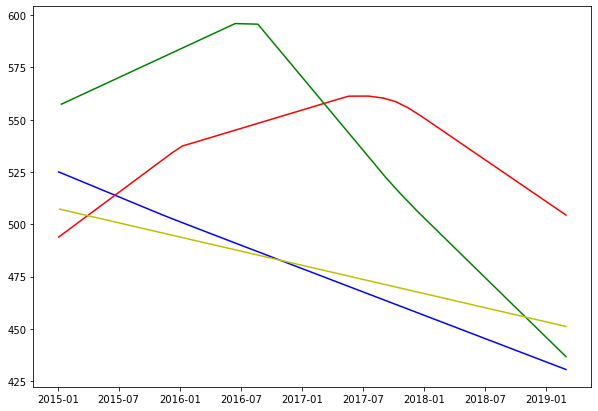

In [18]:
plt.figure(figsize=(10, 7))
plt.plot(central_furniture_forecast['ds'], central_furniture_forecast['trend'], 'b-')
plt.plot(west_furniture_forecast['ds'], west_furniture_forecast['trend'], 'r-')
plt.plot(east_furniture_forecast['ds'], east_furniture_forecast['trend'], 'g-')
plt.plot(south_furniture_forecast['ds'], south_furniture_forecast['trend'], 'y-')


In [19]:
central_office_supplies_forecast = central_office_supplies_model.predict(central_office_supplies_future)
west_office_supplies_forecast = west_office_supplies_model.predict(west_office_supplies_future)
east_office_supplies_forecast = east_office_supplies_model.predict(east_office_supplies_future)
south_office_supplies_forecast = south_office_supplies_model.predict(south_office_supplies_future)

#save to a csv
central_office_supplies_forecast.to_csv(r'../central_office_supplies_forecast.csv', index=False)
west_office_supplies_forecast.to_csv(r'../west_office_supplies_forecast.csv', index=False)
east_office_supplies_forecast.to_csv(r'../east_office_supplies_forecast.csv', index=False)
south_office_supplies_forecast.to_csv(r'../south_office_supplies_forecast.csv', index=False)

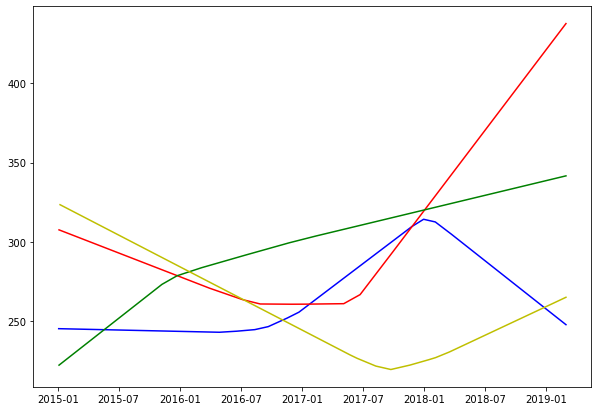

In [21]:
plt.figure(figsize=(10, 7))
plt.plot(central_office_supplies_forecast['ds'], central_office_supplies_forecast['trend'], 'b-')
plt.plot(west_office_supplies_forecast['ds'], west_office_supplies_forecast['trend'], 'r-')
plt.plot(east_office_supplies_forecast['ds'], east_office_supplies_forecast['trend'], 'g-')
plt.plot(south_office_supplies_forecast['ds'], south_office_supplies_forecast['trend'], 'y-')

In [22]:
central_technology_forecast = central_technology_model.predict(central_technology_future)
west_technology_forecast = west_technology_model.predict(west_technology_future)
east_technology_forecast = east_technology_model.predict(east_technology_future)
south_technology_forecast = south_technology_model.predict(south_technology_future)

#save to a csv
central_technology_forecast.to_csv(r'../central_technology_forecast.csv', index=False)
west_technology_forecast.to_csv(r'../west_technology_forecast.csv', index=False)
east_technology_forecast.to_csv(r'../east_technology_forecast.csv', index=False)
south_technology_forecast.to_csv(r'../south_technology_forecast.csv', index=False)

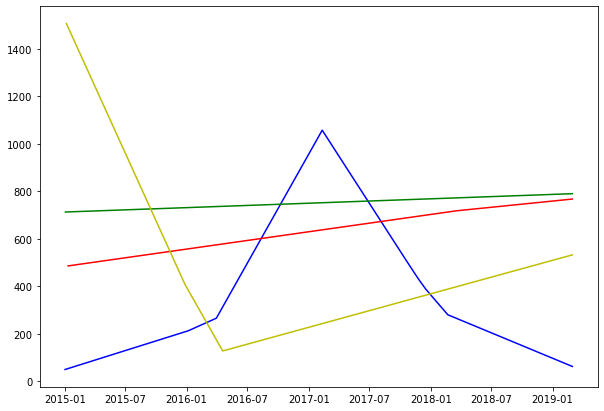

In [23]:
plt.figure(figsize=(10, 7))
plt.plot(central_technology_forecast['ds'], central_technology_forecast['trend'], 'b-')
plt.plot(west_technology_forecast['ds'], west_technology_forecast['trend'], 'r-')
plt.plot(east_technology_forecast['ds'], east_technology_forecast['trend'], 'g-')
plt.plot(south_technology_forecast['ds'], south_technology_forecast['trend'], 'y-')